In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [5]:
from google.colab  import files
uploaded = files.upload()

Saving webmd .csv to webmd .csv


In [6]:
import pandas as pd
import io
  
df= pd.read_csv(io.BytesIO(uploaded["webmd .csv"]))

In [7]:
df.shape

(355835, 12)

In [8]:
df2 = df[[ 'Condition', 'Drug','Age', 'Sex', 'EaseofUse', 'Effectiveness', 'Satisfaction',  'Reviews',  'Sides']]
df2.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
0,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."
1,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."
2,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."
3,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."
4,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."


In [9]:
df2.count()

Condition        355835
Drug             355835
Age              355835
Sex              355835
EaseofUse        355835
Effectiveness    355835
Satisfaction     355835
Reviews          355800
Sides            355835
dtype: int64

In [10]:
df.eq(' ').sum()

Age              11836
Condition         4273
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          40999
Satisfaction         0
Sex              26116
Sides            13116
UsefulCount          0
dtype: int64

In [11]:
uniqueValues = df2.nunique(dropna=True)
print("Count Unique values in each column including NaN")
print(uniqueValues)

Count Unique values in each column including NaN
Condition          1813
Drug               5656
Age                  12
Sex                   3
EaseofUse             6
Effectiveness         6
Satisfaction          6
Reviews          244226
Sides              1595
dtype: int64


In [12]:
df2[df2.duplicated()].shape

(8289, 9)

In [13]:
df3=df2.drop_duplicates()

In [14]:
df3.eq(' ').sum()

Condition         4244
Drug                 0
Age              11362
Sex              25570
EaseofUse            0
Effectiveness        0
Satisfaction         0
Reviews          33681
Sides            12635
dtype: int64

<AxesSubplot:>

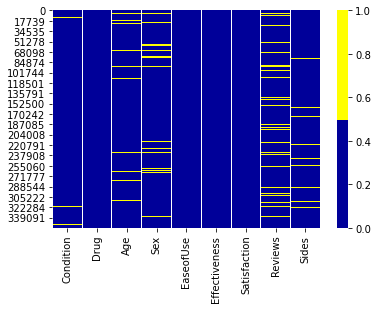

In [ ]:
import seaborn as sns
cols = df3.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df3[cols].eq(' '),
            cmap=sns.color_palette(colours))

In [15]:
df3=df3.replace('',np.nan,regex=True).replace('',np.nan)

In [16]:
df3.isna().sum()

Condition         0
Drug              0
Age               0
Sex               0
EaseofUse         0
Effectiveness     0
Satisfaction      0
Reviews          35
Sides             0
dtype: int64

In [17]:
df4=df3.dropna()

In [18]:
df4.eq('').sum()

Condition        0
Drug             0
Age              0
Sex              0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Reviews          0
Sides            0
dtype: int64

In [19]:
df4.shape

(347511, 9)

<AxesSubplot:>

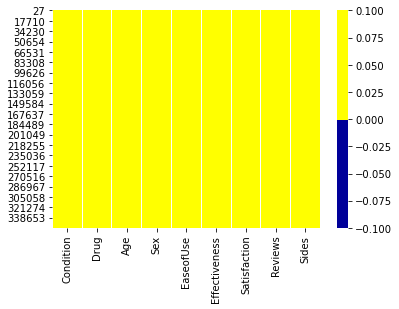

In [ ]:
import seaborn as sns
cols = df4.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df4[cols].isna(),
            cmap=sns.color_palette(colours))

## Data visualization

In [ ]:
!pip install WordCloud
!pip install STOPWORDS

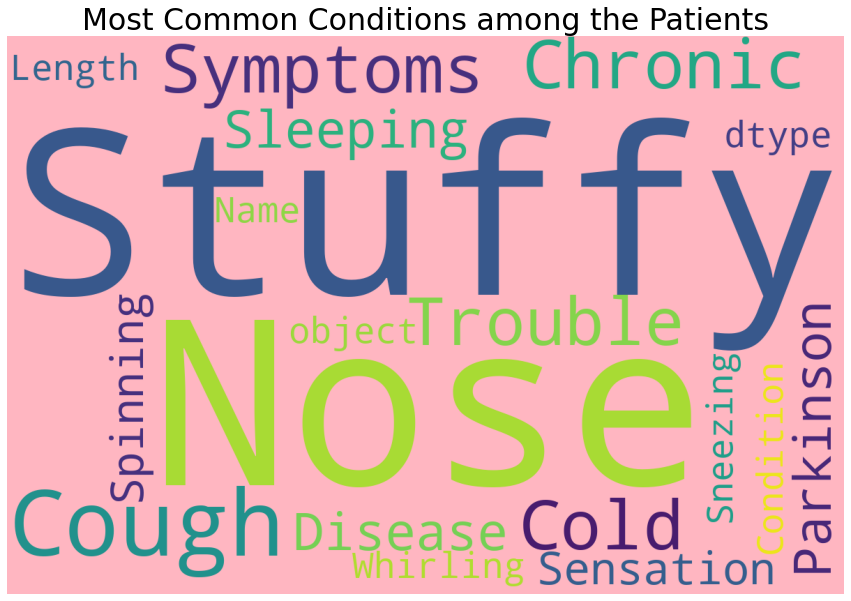

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightpink', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df4['Condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Graphical representation of most popular drug that patient prefers

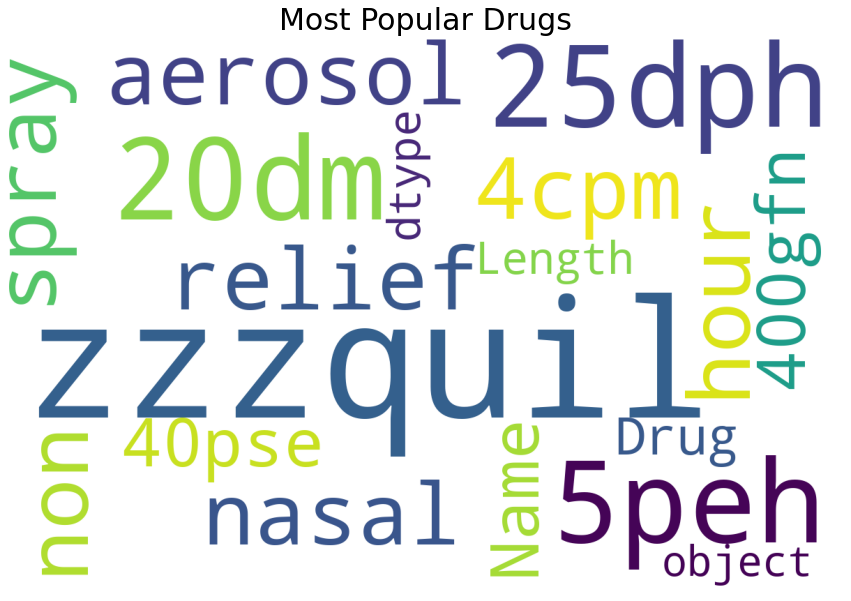

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df4['Drug']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Checking the most popular drug per condition

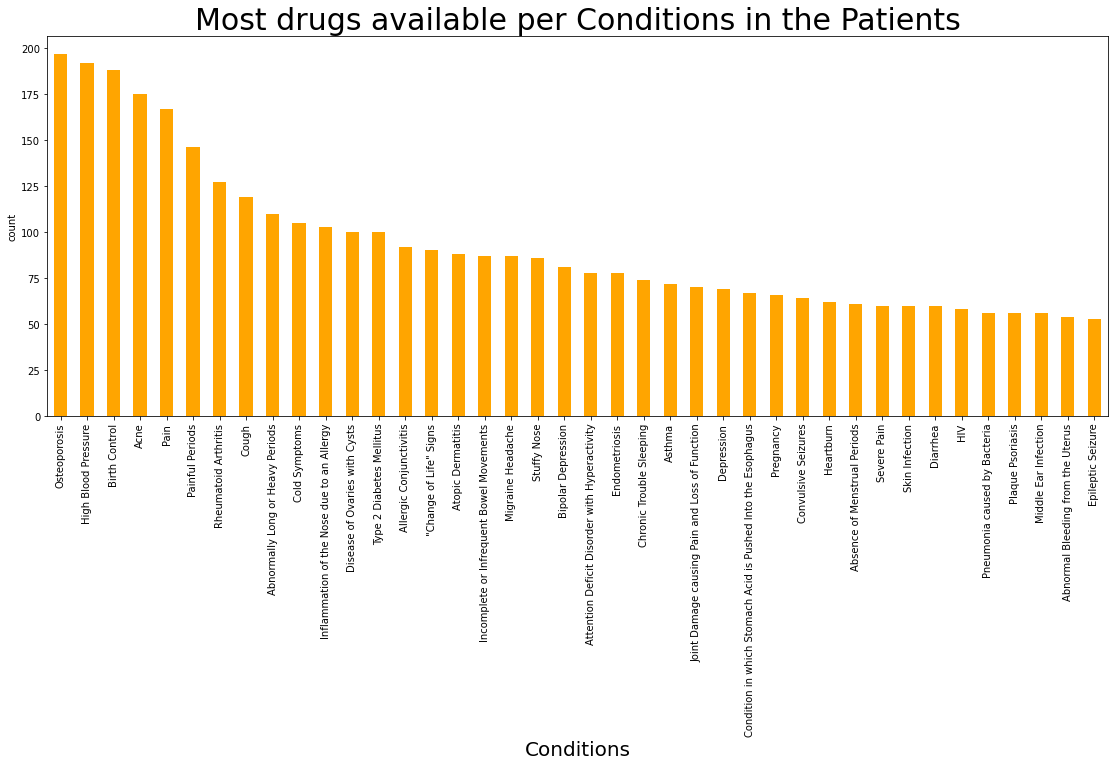

In [ ]:
df4.groupby(['Condition'])['Drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'Orange')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

## Checking the most popular drug per condition

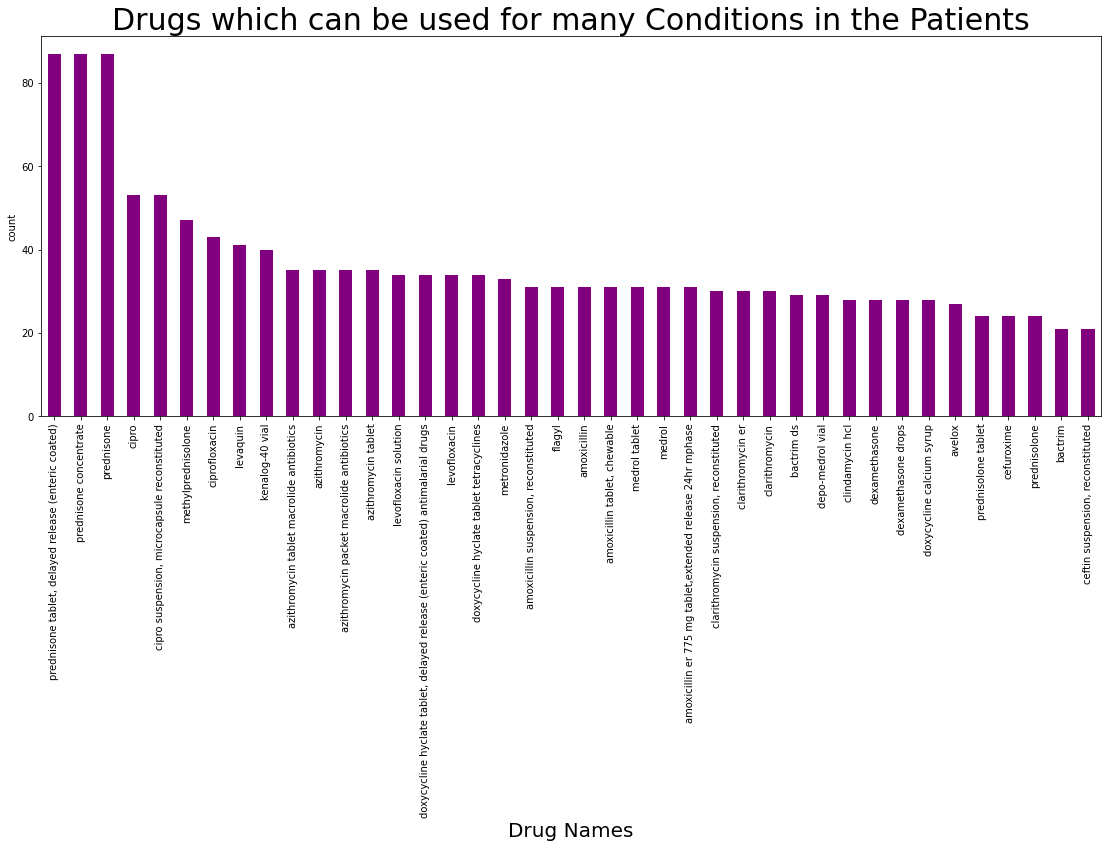

In [ ]:
df4.groupby(['Drug'])['Condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()


## Checking the different types of conditions patients

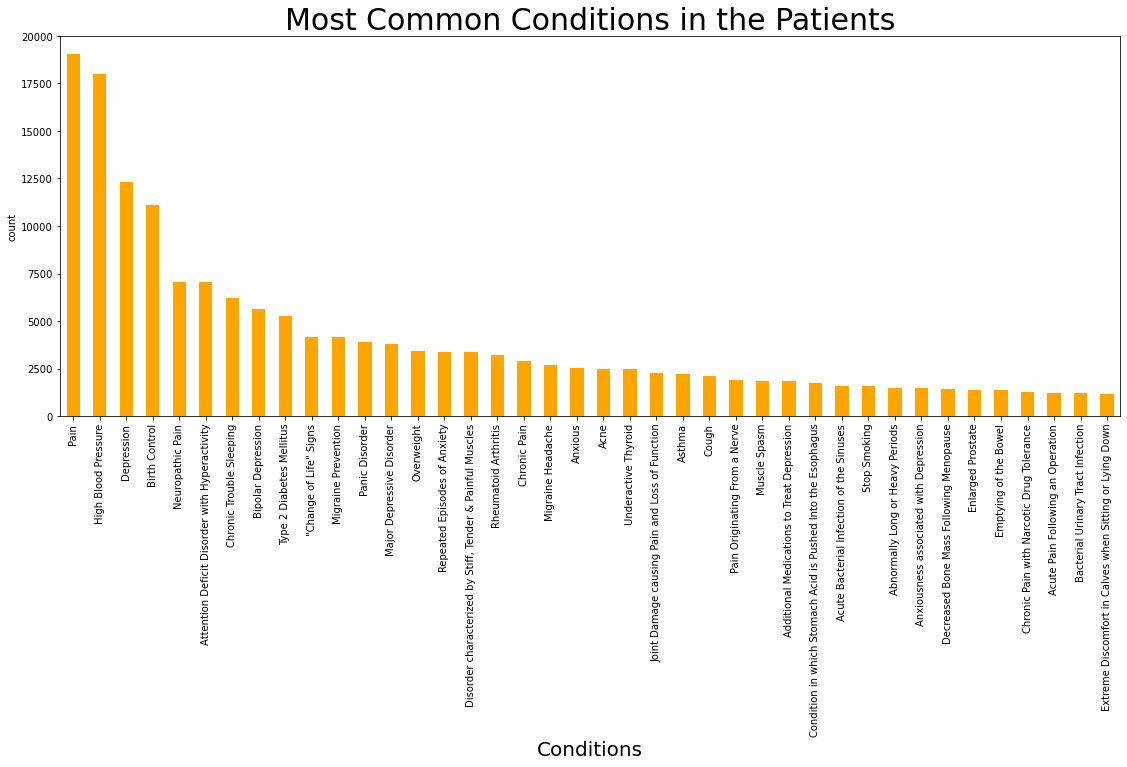

In [ ]:
df4['Condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'Orange')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

### Let's read some reviews

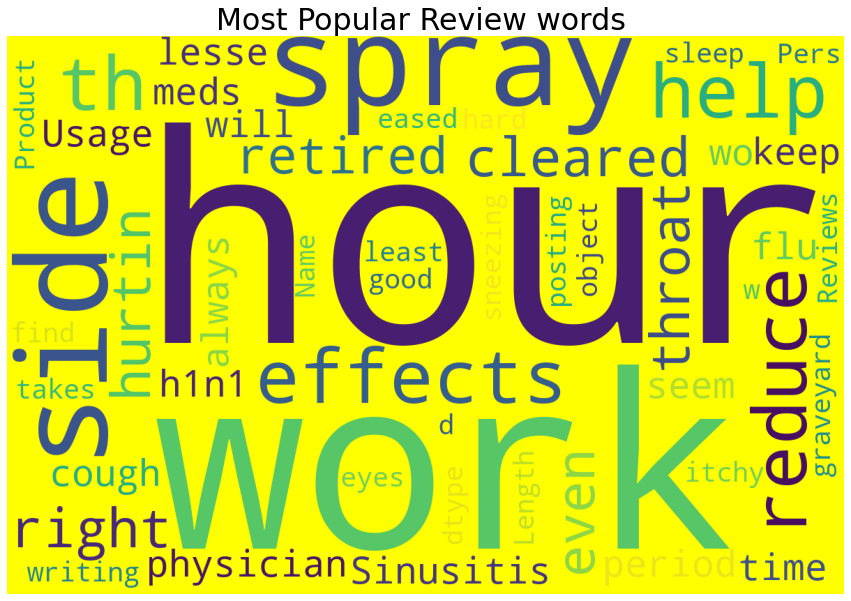

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(df4['Reviews']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Review words ', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

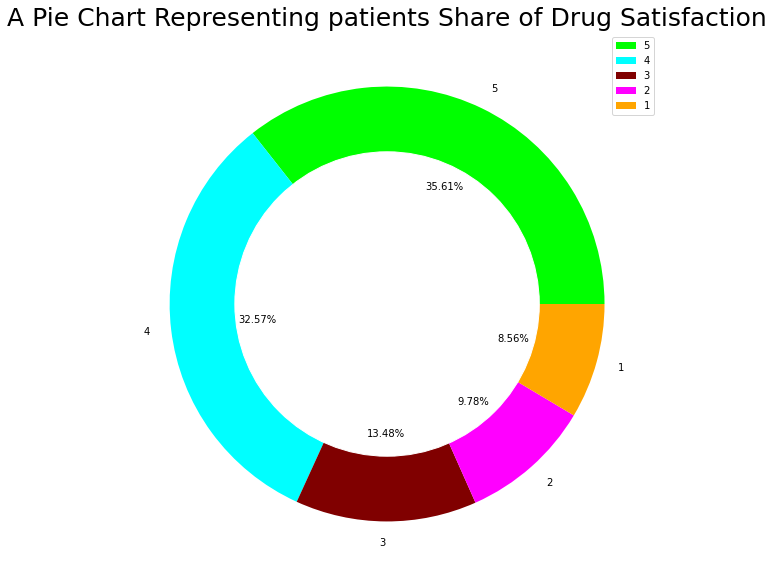

In [ ]:
size = [6556, 5996, 2482, 1800, 1576]
colors = ['lime', 'cyan', 'maroon',  'magenta', 'orange']
labels = "5", "4", "3", "2", "1"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing patients Share of Drug Satisfaction', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

##  Data Cleaning using Natural Language Processing

In [20]:
!pip install nltk
!pip install stopwords

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [22]:

import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [23]:
df4["Reviews"]=df4['Reviews'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df4['Reviews'] = df4["Reviews"].apply(clean)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df4.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
0,Runny Nose,12 hour decongestant,55-64,Male,4,4,4,,"Nausea , vomiting , trouble sleeping , dizz..."
27,Stuffy Nose,"12 hour nasal relief spray, non-aerosol",55-64,Male,4,2,2,the hour spray only works for me for hours,"Temporary burning, stinging, dryness in the no..."
54,Cold Symptoms,15dm-100gfn-5peh,25-34,Male,3,5,1,,"Dizziness , headache , nausea , nervousness,..."
81,Cough,20dm-4cpm,55-64,Female,5,1,1,no side effects but it did not help reduce the...,"Drowsiness, dizziness , blurred vision , na..."
108,Cold Symptoms,25dph-7.5peh,25-34,Female,5,5,5,cleared me right up even with my throat hurtin...,"Drowsiness, dizziness , dry mouth /nose/thro..."


In [28]:
#stratified sampling only with many classes with minimum length or max=x

drug=pd.DataFrame(df4.groupby(['Condition','Age','Sex','Drug'],as_index=False)['EaseofUse','Effectiveness','Satisfaction'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
drug.shape

(82328, 7)

In [30]:
drug_rev=pd.DataFrame(df4.fillna('').groupby(['Condition','Age','Sex','Drug'],as_index=False).agg({'Reviews': ','.join}))

In [31]:
drug_rev.shape

(82328, 5)

In [32]:
drug_side=pd.DataFrame(df4.fillna('').groupby(['Condition','Age','Sex','Drug'],as_index=False).agg({'Sides': ','.join}))

In [33]:
drug_rev.shape

(82328, 5)

In [34]:
#eda.to_excel("c:/Users/shy/edarevd.xlsx")
from google.colab import files
drug.to_excel('drg.xlsx')

In [36]:
files.download('drg.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
drug_rev.to_excel('drg_rev.xlsx')

In [38]:
files.download('drg_rev.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
drug_side.to_excel('drg_side.xlsx')

In [40]:
files.download('drg_side.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab  import files
uploaded1 = files.upload()

In [ ]:
uniqueValues = df6.nunique(dropna=True)
print("Count Unique values in each column including NaN")
print(uniqueValues)

Count Unique values in each column including NaN
Condition         1378
Drug              4028
Age                 11
Sex                  2
EaseofUse            5
Effectiveness        5
Satisfaction         5
Reviews          85888
Sides             1435
dtype: int64


In [ ]:
df6.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides
62856,"""Change of Life"" Signs","climara pro patch, transdermal weekly",55-64,Female,2,5,5,been using the patch for a number of years im ...,Skin redness/irritation at the application si...
116985,"""Change of Life"" Signs",gabapentin solution,75 or over,Female,2,2,2,i dont like the way it makes me feel i receive...,"Drowsiness, dizziness , loss of coordination,..."
97322,"""Change of Life"" Signs",effexor xr,55-64,Female,1,3,1,this is a horrible drug highly addictive do n...,"Nausea , drowsiness, dizziness , dry mouth ,..."
67567,"""Change of Life"" Signs",clonidine hcl,19-24,Female,5,4,3,this medication was actually given to me to re...,"Dizziness , lightheadedness , drowsiness, dr..."
22819,"""Change of Life"" Signs",angeliq,45-54,Female,5,5,4,i ve been taking this drug for just over mont...,"Dizziness , lightheadedness , headache , st..."


In [ ]:
df6.to_csv('df_clean_ultra.csv', index = False)